In [28]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk import tokenize
from nltk.stem.porter import PorterStemmer
from tqdm.contrib.concurrent import thread_map

%matplotlib inline
pd.set_option('display.max_colwidth', 1)


In [2]:
data_news = pd.read_csv("data/data_irony_news.csv", sep='\t')

In [3]:
data_news.head(2)

,text,prediction
0,"GRANJA COMARY – Com a notícia de que Eduardo Cunha renunciou à presidência da Câmara – cargo do qual já estava afastado – Dunga convocou uma coletiva de imprensa para dizer que renuncia ao comando da seleção brasileira. Embora tenha sido demitido do posto um mês atrás, o treinador gaúcho fez uma manobra política de forma a parecer que deixa a vaga por vontade própria. “É público e notório que a seleção está acéfala, vítima de uma interinidade bizarra”, declarou Dunga, sendo aplaudido pela bancada sub-19 do PMDB. “Somente a minha renúncia poderá por fim a essa interinidade sem prazo. A seleção não suportará esperar indefinidamente.” Ele não foi o único a aderir ao programa-de-demissão-voluntária-de-quem-já estava-tecnicamente-demitido. Em Brasília, o ex-ministro Romero Jucá convocou uma coletiva de imprensa para renunciar ao comando da pasta do Planejamento. No Rio de Janeiro, Eike Batista renunciou ao posto de pessoa mais rica do Brasil. Já em Minas Gerais, o goleiro Bruno anunciou que está deixando a camisa número 1 do Flamengo. Na contracorrente, Pedro Paulo disse ontem que não renunciará ao argumento de que todo mundo às vezes exagera numa discussão.",1
1,"Foi sancionada com vetos a Lei Complementar 173, publicada dia 28 de maio de 2020 no Diário Oficial da União, que estabelece o Programa Federativo de Enfrentamento ao Coronavírus para Estados, Distrito Federal e Municípios. O plano prevê a negociação de empréstimos, a suspensão dos pagamentos de dívidas contratadas com a União (estimadas em R$ 65 bilhões) e a entrega de R$ 60 bilhões para os governos locais aplicarem em ações de enfrentamento à pandemia.",0


In [4]:
data_news.shape

(18494, 2)

In [5]:
data_news.prediction.value_counts()

0    11272
1    7222 
Name: prediction, dtype: int64

In [6]:
len(data_news)

18494

In [7]:
data_news = data_news.drop_duplicates(subset='text', keep='first').reset_index(drop=True)

In [8]:
len(data_news)

18375

In [10]:
test = data_news.sample(frac=0.15).reset_index(drop=True)

In [11]:
len(test)

2756

In [12]:
test.prediction.value_counts()

0    1720
1    1036
Name: prediction, dtype: int64

In [15]:
train = data_news[~data_news.text.isin(test.text)].reset_index(drop=True)

In [16]:
len(train)

15619

In [17]:
train[train.text.isin(test.text)]

,text,prediction


In [18]:
test[test.text.isin(train.text)]

,text,prediction


In [19]:
train.to_csv('train_irony.csv', index=False)
test.to_csv('test_irony.csv', index=False)

In [22]:
def pre_process(text):
    words = text.lower().split() #tokenização
    #Remove stopwords
    stops = set(nltk.corpus.stopwords.words('portuguese')) # Pega uma lista de stopwors do Portuguêse salva em stops
    words = [w for w in words if not w in stops] #Retira as palavras que são stopwords
    return words

In [24]:
train['tokenized']= train.text.apply(pre_process)

In [25]:
test['tokenized']= test.text.apply(pre_process)

In [44]:
words_train = train['tokenized']
allwords_train=[]
for wordlist_train in words_train:
    allwords_train+=wordlist_train

In [45]:
mostcommon_train = FreqDist(allwords_train).most_common(100)

/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:513: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/amanda/.local/lib/pyt

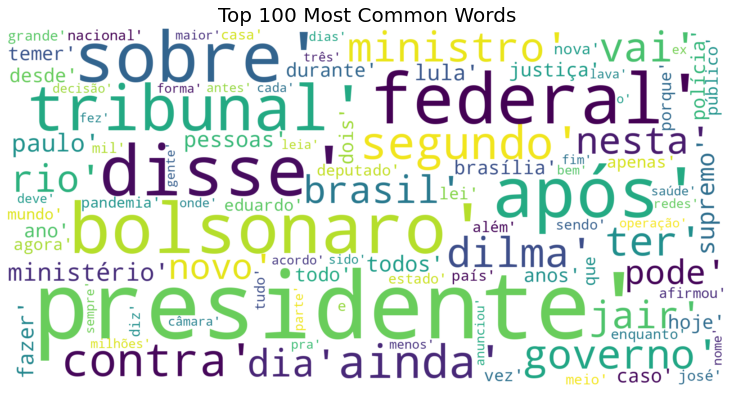

In [46]:
wordcloud=WordCloud(width=2000, height=1000, background_color='white').generate(str(mostcommon_train))
sns.set(style="darkgrid")
fig=plt.figure(figsize=(10,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Top 100 Most Common Words", fontsize=20, color='black')

plt.tight_layout(pad=0)
plt.savefig('wordcloud1.png', format='png')
plt.show()

In [47]:
words_test = test['tokenized']
allwords_test=[]
for wordlist_test in words_test:
    allwords_test+=wordlist_test

In [48]:
mostcommon_test = FreqDist(allwords_test).most_common(100)

/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/amanda/.local/lib/python3.8/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (

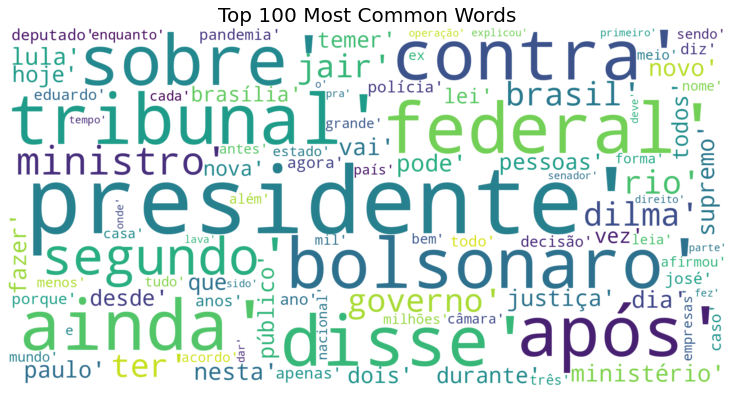

In [49]:
wordcloud=WordCloud(width=2000, height=1000, background_color='white').generate(str(mostcommon_test))
sns.set(style="darkgrid")
fig=plt.figure(figsize=(10,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Top 100 Most Common Words", fontsize=20, color='black')

plt.tight_layout(pad=0)
plt.savefig('wordcloud1.png', format='png')
plt.show()